<a href="https://colab.research.google.com/github/Gaurgirl6117/ImageXClassifyXNeuralNetwork/blob/main/ImageXClassifyXNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ImageXClassifyXNeuralNetwork**



Importing the required libraries



In [ ]:
# Library for plotting the images and the loss function
import matplotlib.pyplot as plt

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

Downloading the dataset and normalizing the pixel values

In [ ]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


Defining the image classes

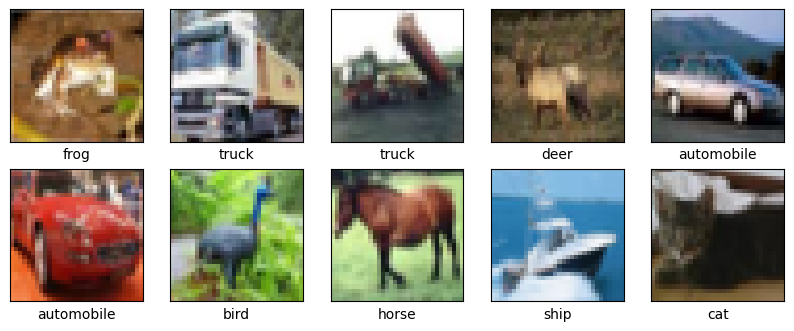

In [ ]:
# Define the 10 image classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Building the Convolution Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

Model Summary 

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Fitting the Model: Train, Test and Validation

In [ ]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 84s 52ms/step - loss: 0.5880 - accuracy: 0.7919 - val_loss: 0.9096 - val_accuracy: 0.7032
Epoch 2/20
1563/1563 [==============================] - 79s 51ms/step - loss: 0.5529 - accuracy: 0.8039 - val_loss: 0.9222 - val_accuracy: 0.7079
Epoch 3/20
1563/1563 [==============================] - 79s 50ms/step - loss: 0.5193 - accuracy: 0.8156 - val_loss: 0.9450 - val_accuracy: 0.6969
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4882 - accuracy: 0.8270 - val_loss: 0.9419 - val_accuracy: 0.7087
Epoch 5/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4601 - accuracy: 0.8366 - val_loss: 0.9800 - val_accuracy: 0.7098
Epoch 6/20
1563/1563 [==============================] - 79s 51ms/step - loss: 0.4312 - accuracy: 0.8458 - val_loss: 1.0223 - val_accuracy: 0.7007
Epoch 7/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.4083 - accuracy: 0.8531 - val_loss: 1.0545 -

Evaluating the Model

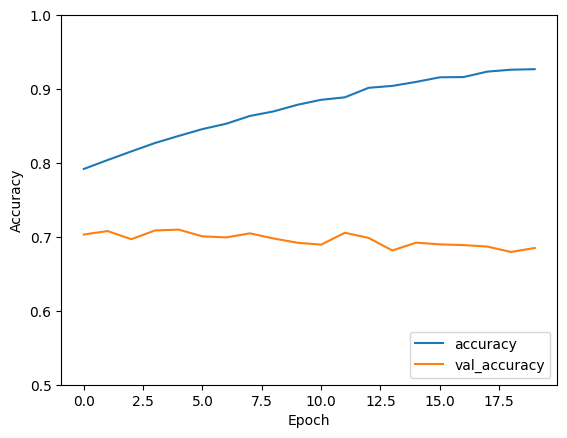

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')